# Negation #

In [1]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagram_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')

In [5]:
# als Teilwort
def all(c):
    return True
def find_filter(contains):
    def f(element):
        return element['text'].lower().find(contains) > 0
    return f
def allNegations(element):
    negation_words = ['nie', 'nicht', 'kein', 'nein', 'weder', 'falsch', 'nirgend']
    for nw in negation_words:
        if element['text'].lower().find(nw) > 0:
            return True
    return False

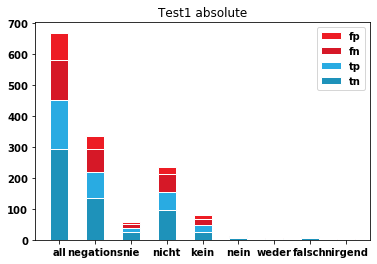

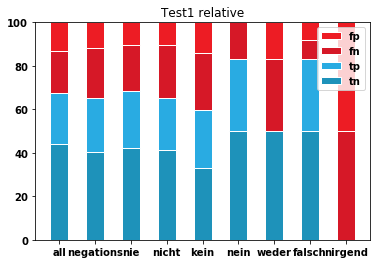

In [6]:
diagram_filters = []
diagram_filters.append(('all', all))
diagram_filters.append(('negations',allNegations))
diagram_filters.append(('nie',find_filter('nie')))
diagram_filters.append(('nicht',find_filter('nicht')))
diagram_filters.append(('kein',find_filter('kein')))
diagram_filters.append(('nein',find_filter('nein')))
diagram_filters.append(('weder',find_filter('weder')))
diagram_filters.append(('falsch',find_filter('falsch')))
diagram_filters.append(('nirgend',find_filter('nirgend')))

#name, filters, relative
create_plt(name = "Test1 absolute", filters = diagram_filters, relative = False)
create_plt(name = "Test1 relative", filters = diagram_filters, relative = True)

In [8]:
print('all')
show_metrics(calc_metrics())
print('contains all negations')
show_metrics(calc_metrics(allNegations))
print('contains all negations difference')
show_metrics(calc_metric_difference(calc_metrics(allNegations)))

all


,label hate (287),label nohate (383)
pred hate (245),157,88
pred nohate (425),130,295


accuracy,precision,recall,f1_score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


contains all negations


,label hate (160),label nohate (175)
pred hate (124),84,40
pred nohate (211),76,135


accuracy,precision,recall,f1_score
0.6537313432835821,0.6774193548387096,0.525,0.5915492957746479


contains all negations difference


,label hate (287),label nohate (383)
pred hate (281),233,48
pred nohate (389),54,335


accuracy,precision,recall,f1_score
0.8477611940298507,0.8291814946619217,0.8118466898954704,0.8204225352112676
